In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Linear regression with one variable

In [2]:
X, y = np.loadtxt('ex1/ex1data1.txt', delimiter = ',', unpack = 'True')
m = X.size # number of training examples
#print (X)
#print(y)

2.1 Plotting the data

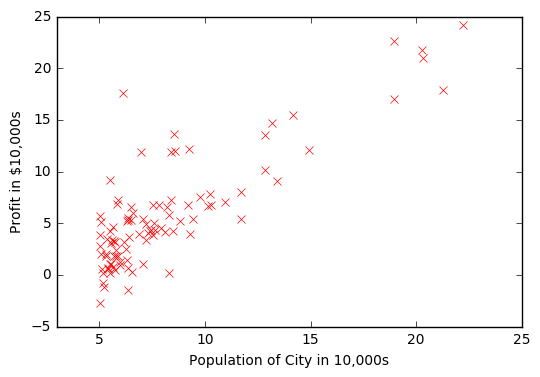

In [3]:
plt.plot( X, y, 'rx' )
plt.axis([3,25,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

2.2 Gradient descent

In [4]:
# preparing the design matrix
X = np.array([X])
X = np.reshape(X, (m, 1))
X = np.insert(X, 0, 1, axis = 1)

In [5]:
# preparing the labels vector
y = np.array([y])
y = np.reshape(y, (m, 1))

In [6]:
# preparing the weights vector
theta = np.array([np.zeros(2)])
theta = theta.reshape(2,1)
print(X.shape, '*', theta.shape, '=?', y.shape )

(97, 2) * (2, 1) =? (97, 1)


In [7]:
# Cost (loss) function
def compute_cost( X, y, theta ):
    return (0.5/len(X)) * np.dot( ( np.dot(X, theta) - y ).transpose(), ( np.dot(X, theta) - y ) )

In [8]:
print( compute_cost(X,y,theta) )

[[ 32.07273388]]


In [9]:
iterations = 1500
alpha = 0.01

In [10]:
def gradient_descent1( X, y, theta, alpha, iterations ):
    m = len(X)
    J_history = np.zeros(iterations)
    for i in range(iterations):
        x0 = np.array([X[:, 0]]).reshape(1, m)
        x1 = np.array([X[:, 1]]).reshape(1, m)
        temp0 = theta[0] - (alpha/m) * np.dot( x0, ( np.dot(X, theta) - y ) )
        temp1 = theta[1] - (alpha/m) * np.dot( x1, ( np.dot(X, theta) - y ) )
        theta[0] = temp0
        theta[1] = temp1
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

In [11]:
pred_theta, J_log = gradient_descent1( X, y, theta, alpha, iterations )
print( 'Predicted theta values = ', pred_theta )

Predicted theta values =  [[-3.63029144]
 [ 1.16636235]]


In [12]:
def J_history_plot( J_log, iterations, xadd, xmin, xmax ):
    iter = np.arange(1, iterations + 1)
    plt.plot( iter, J_log, 'ro', markersize = 1)
    plt.xlabel('Iteration number')
    plt.ylabel(r'J('r"$\theta$"')')
    plt.axis([0, len(J_log)+xadd, xmin, xmax])
    plt.show()

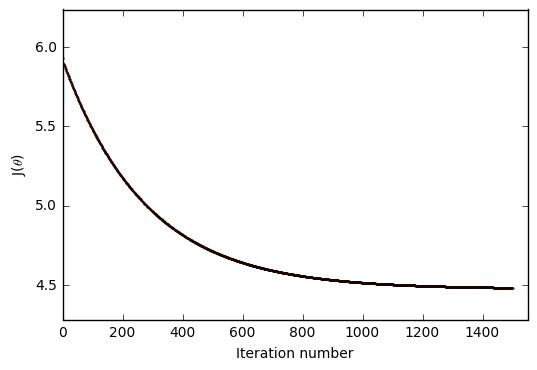

In [13]:
J_history_plot(J_log, iterations, 50, J_log.min()-0.2, J_log.max()-0.5)

In [14]:
n1 = 5
n2 = 25
predict1 = np.dot (np.array([[1, 5]]), pred_theta)
predict2 = np.dot (np.array([[1, 25]]), pred_theta)
print('For population = %i, we predict a profit of %0.2f\n' %(n1*10000, predict1*10000) )
print( 'For population = %i, we predict a profit of %0.2f\n' %(n2*10000, predict2*10000) )

For population = 50000, we predict a profit of 22015.20

For population = 250000, we predict a profit of 255287.67



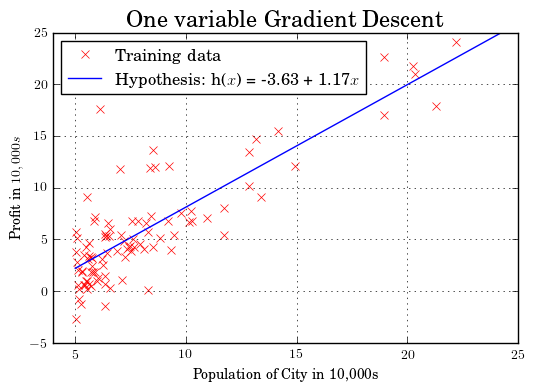

In [15]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.plot( X[:, 1], y, 'rx', label = 'Training data' ) # If X is plotted the label will appear twice in the legend - one time per column
plt.plot([5,25], [2.20152031, 25.9032614],label = r'Hypothesis: h('r"$x$"') = %0.2f + %0.2f' r"$x$" %(theta[0],theta[1]) )
plt.title('One variable Gradient Descent',
          fontsize=16, color='black')
plt.axis([4,25,-5,25])
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc='upper left', numpoints = 1)
#plt.show()

2.4 Visualizing the cost function

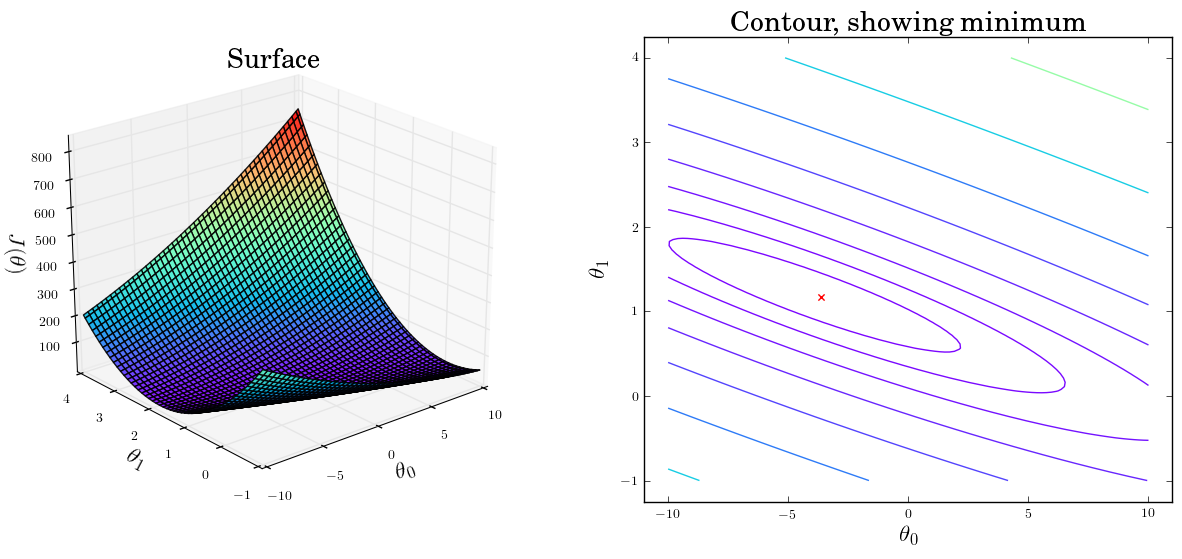

In [16]:
from mpl_toolkits.mplot3d import axes3d

# creating the grid for the plot
theta0_vals = np.linspace(-10, 10, num=100)
theta1_vals = np.linspace(-1, 4, num=100)
xv, yv = np.meshgrid(theta0_vals, theta1_vals, sparse = False, indexing='xy')
J_vals = np.zeros( ( len(theta0_vals), len(theta1_vals) ) )
#print(xv)
#print(yv)

# computing the values of the cost function
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [[xv[i,j]], [yv[i,j]]]
        J_vals[i,j] = compute_cost(X, y, t)
        
fig = plt.figure( figsize=(15,6) )
surf = fig.add_subplot(1, 2, 1, projection = '3d')
contour = fig.add_subplot(1, 2, 2)

# cost function surface plot
surf.plot_surface(xv, yv, J_vals, rstride=2, cstride=2, alpha=0.9, cmap=plt.cm.rainbow)
surf.view_init(elev=25, azim=230)
surf.set_title('Surface', fontsize=19 )
surf.set_zlabel(r"$J(\theta)$", fontsize=17)
surf.set_zlim(J_vals.min(),J_vals.max()+100)


# cost function contour plot
contour.contour(xv, yv, J_vals, np.logspace(-2, 3, 20), cmap=plt.cm.rainbow)
contour.scatter(pred_theta[0], pred_theta[1], c='r', s=20, marker='x' )
contour.set_title('Contour, showing minimum', fontsize=20)

# settings common to both plots
for axis in fig.axes:
    axis.set_xlabel(r'$\theta_0$', fontsize=17)
    axis.set_ylabel(r'$\theta_1$', fontsize=17)

# 3. Linear regression with multiple variables

In [17]:
data = np.loadtxt('ex1/ex1data2.txt', delimiter = ',')
np.set_printoptions(suppress=True)
X = np.c_[data[:,0:2]]
y = np.c_[data[:,2]]
#print(X)
#print(y)
m = len(X) # number of training examples

3.1 Feature normalization

In [18]:
# save the mean and STD of each feature
meanX = np.array([X.mean(axis=0)])
stdX = np.array([X.std(axis=0)])

meanX = np.c_[np.zeros(meanX.shape[0]), meanX]
stdX = np.c_[np.ones(stdX.shape[0]), stdX]

# preparing the design matrix
X = (X - X.mean(axis=0))/X.std(axis=0)
X=np.c_[np.ones(data.shape[0]),X] 
print(X.shape)


(47, 3)


In [19]:
# preparing the weights vector
d = X.shape[1]
theta = np.array([np.zeros(d)])
theta = theta.reshape(d,1)
print(X.shape, '*', theta.shape, '=?', y.shape )

(47, 3) * (3, 1) =? (47, 1)


3.2 Gradient descent

In [20]:
# Same function as before, but generalised notation
def gradient_descent( X, y, theta, alpha, iterations ):
    m = len(X[0])
    J_history = np.zeros(iterations)
    for i in range(iterations):
        h = np.dot(X, theta)
        theta = theta - (alpha/m) * np.dot( X.transpose(), (h - y) )
        J_history[i] = compute_cost(X, y, theta)
    return theta, J_history

In [21]:
iterations = 50
alpha = 0.007

In [22]:
pred_theta, J_log = gradient_descent( X, y, theta, alpha, iterations )
print( 'The predicted theta values are: ', pred_theta )

The predicted theta values are:  [[ 339390.22066666]
 [ 104551.17310331]
 [  -1690.40133649]]


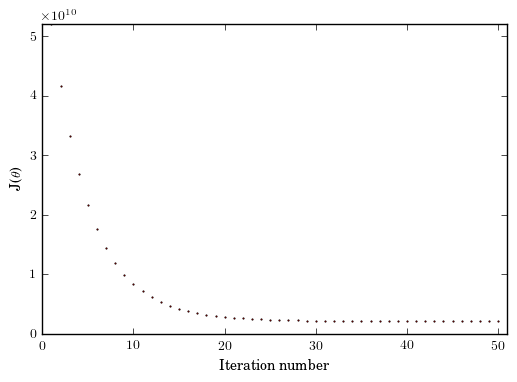

In [23]:
J_history_plot(J_log, iterations, 1, 0, J_log.max())

In [24]:
analytic_theta = np.linalg.inv( np.dot(X.transpose(), X) ).dot( np.dot(X.transpose() , y) )

In [25]:
print( 'The analytic theta values are: ', analytic_theta, '\n' )

x_test = np.array([[1, 1650, 3]])
x_test_standardised = (x_test - meanX)/stdX
print(x_test_standardised, '\n')

print( 'Prediction using linear reg. = ', x_test_standardised.dot(pred_theta)[0][0], '$' )
print( 'Prediction using normal eq. = ', x_test_standardised.dot(analytic_theta)[0][0], '$' )

The analytic theta values are:  [[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]] 

[[ 1.         -0.44604386 -0.22609337]] 

Prediction using linear reg. =  293138.000345 $
Prediction using normal eq. =  293081.464335 $
